# Importing Neccessary Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns




# Reading training and test datasets

In [2]:
train = pd.read_csv("/kaggle/input/ml-dataset/train (2).csv")
test = pd.read_csv("/kaggle/input/ml-dataset/test (2).csv") 

/tmp/ipykernel_30/3154378123.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/kaggle/input/ml-dataset/train (2).csv")


# Checking null values

In [3]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         8029
Age                             0
Number                          0
Profession                      0
Income_Annual                   0
Base_Salary_PerMonth        12032
Total_Bank_Accounts             0
Total_Credit_Cards              0
Rate_Of_Interest                0
Total_Current_Loans             0
Loan_Type                    9157
Delay_from_due_date             0
Total_Delayed_Payments       5595
Credit_Limit                    0
Total_Credit_Enquiries       1549
Credit_Mix                      0
Current_Debt_Outstanding        0
Ratio_Credit_Utilization        0
Credit_History_Age           7240
Payment_of_Min_Amount           0
Per_Month_EMI                   0
Monthly_Investment           3605
Payment_Behaviour               0
Monthly_Balance               950
Credit_Score                    0
dtype: int64

# Checking data types of each column

In [4]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
Number                       object
Profession                   object
Income_Annual                object
Base_Salary_PerMonth        float64
Total_Bank_Accounts           int64
Total_Credit_Cards            int64
Rate_Of_Interest              int64
Total_Current_Loans          object
Loan_Type                    object
Delay_from_due_date           int64
Total_Delayed_Payments       object
Credit_Limit                 object
Total_Credit_Enquiries      float64
Credit_Mix                   object
Current_Debt_Outstanding     object
Ratio_Credit_Utilization    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Per_Month_EMI               float64
Monthly_Investment           object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

# Description of Dataset

In [5]:
train.describe()

,Base_Salary_PerMonth,Total_Bank_Accounts,Total_Credit_Cards,Rate_Of_Interest,Delay_from_due_date,Total_Credit_Enquiries,Ratio_Credit_Utilization,Per_Month_EMI
count,67968.000000,80000.000000,80000.000000,80000.000000,80000.000000,78451.000000,80000.000000,80000.000000
mean,4189.211406,17.046287,22.175438,72.261350,21.081663,28.153115,32.273436,1414.789973
std,3181.371100,116.953761,128.083595,466.370837,14.855210,194.812201,5.116887,8323.122028
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1623.664167,4.000000,4.000000,8.000000,10.000000,3.000000,28.052046,30.305498
50%,3086.683333,6.000000,5.000000,14.000000,18.000000,6.000000,32.292625,68.839655
75%,5950.863333,7.000000,7.000000,20.000000,28.000000,9.000000,36.482439,160.585877
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,49.564519,82331.000000


# Checking for duplicate rows

In [6]:
train.duplicated().any()

False

#### Seeing all the columns which are object

In [7]:
for i in train.columns:
    if train[i].dtype == type(object):
        print(i,end=': ')
        print('\n',train[i].unique())
        print()

ID: 
 ['0x522a' '0x6091' '0xcb5f' ... '0x9589' '0x74fe' '0x236c2']

Customer_ID: 
 ['CUS_0x2dbf' 'CUS_0x8167' 'CUS_0x3a0b' ... 'CUS_0x3f7' 'CUS_0x1915'
 'CUS_0x9daa']

Month: 
 ['May' 'August' 'February' 'March' 'June' 'July' 'April' 'January']

Name: 
 ['Abhishek Vishnoiw' 'Freifeldu' nan ... 'Gerry Shihz' 'Sarah McBrided'
 'Halsq']

Age: 
 ['51' '23' '49' ... '5429' '1609' '2895']

Number: 
 ['370-51-2390' '721-85-0529' '618-96-2558' ... '777-30-0937' '789-15-7049'
 '836-74-3048']

Profession: 
 ['Musician' 'Writer' 'Doctor' 'Accountant' '_______' 'Engineer' 'Manager'
 'Media_Manager' 'Teacher' 'Developer' 'Architect' 'Mechanic' 'Lawyer'
 'Entrepreneur' 'Scientist' 'Journalist']

Income_Annual: 
 ['101583.48' '101926.95' '158871.12' ... '114082.64_' '30000.82_'
 '8227.855_']

Total_Current_Loans: 
 ['4_' '1' '3' '5' '9_' '-100' '0' '4' '9' '2' '7' '6' '8' '1_' '3_' '6_'
 '27_' '0_' '5_' '172' '430' '574' '1484' '7_' '2_' '527_' '1461' '773'
 '8_' '192' '1112' '1354' '1271' '931' '140

### Getting count for each element of the column and plotting distribution on pie chart if the column has categorical data else plotting on bar graph if the column has numerical value  

In [8]:
train["Credit_Mix"].value_counts()

Credit_Mix
Standard    29214
Good        19455
_           16108
Bad         15223
Name: count, dtype: int64

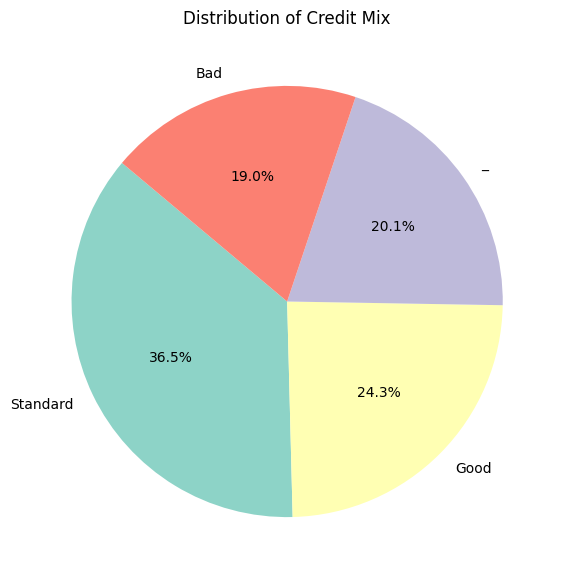

In [9]:
plt.figure(figsize=(10, 7))
loan_purpose_counts = train['Credit_Mix'].value_counts()
plt.pie(loan_purpose_counts, labels=loan_purpose_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))

plt.title('Distribution of Credit Mix')
plt.show()

In [10]:
train["Credit_Limit"].value_counts()

Credit_Limit
_                     1691
11.5                   108
8.22                   106
11.32                  103
10.06                   97
                      ... 
13.829999999999998       1
27.37                    1
13.989999999999998       1
27.63                    1
12.420000000000002       1
Name: count, Length: 4120, dtype: int64

In [11]:
train["Monthly_Balance"].value_counts()

Monthly_Balance
__-333333333333333333333333333__    7
265.7825805774835                   1
408.12087843682195                  1
379.8801551293129                   1
468.19642743520586                  1
                                   ..
682.5196745948223                   1
423.27634935045853                  1
416.16787675446466                  1
226.81921046648208                  1
858.281177                          1
Name: count, Length: 79044, dtype: int64

In [12]:
train["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      20470
High_spent_Medium_value_payments    14057
Low_spent_Medium_value_payments     11101
High_spent_Large_value_payments     10931
High_spent_Small_value_payments      9034
Low_spent_Large_value_payments       8309
!@9#%8                               6098
Name: count, dtype: int64

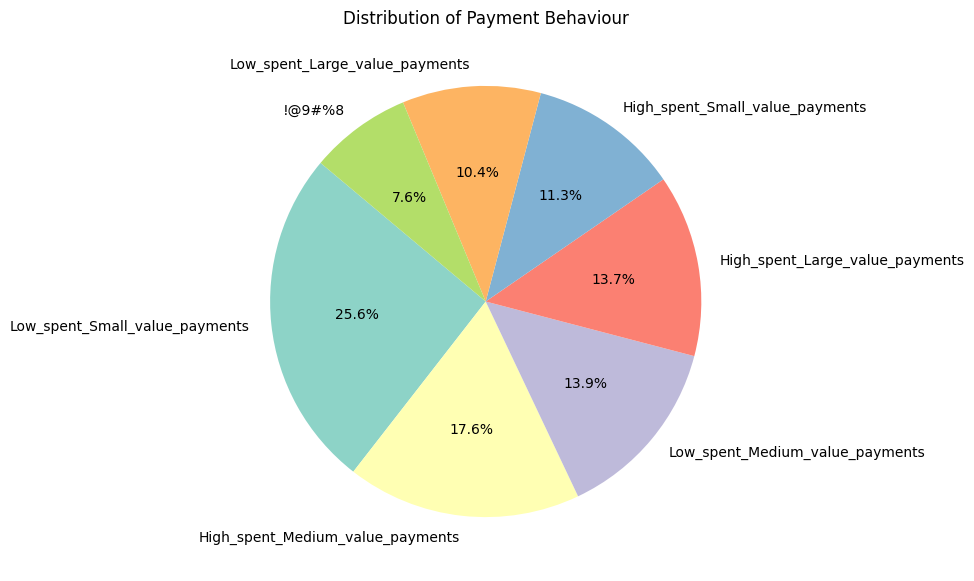

In [13]:
plt.figure(figsize=(10, 7))
counts = train['Payment_Behaviour'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))

plt.title('Distribution of Payment Behaviour')
plt.show()

In [14]:
train["Total_Current_Loans"].value_counts()

Total_Current_Loans
3       11543
2       11417
4       11152
0        8327
1        8067
        ...  
1387        1
795         1
1457        1
1015        1
1135        1
Name: count, Length: 381, dtype: int64

In [15]:
train["Profession"].value_counts()

Profession
_______          5691
Lawyer           5273
Architect        5100
Mechanic         5095
Engineer         5067
Scientist        5044
Accountant       5007
Teacher          4990
Media_Manager    4959
Developer        4946
Journalist       4909
Entrepreneur     4857
Doctor           4843
Manager          4810
Musician         4717
Writer           4692
Name: count, dtype: int64

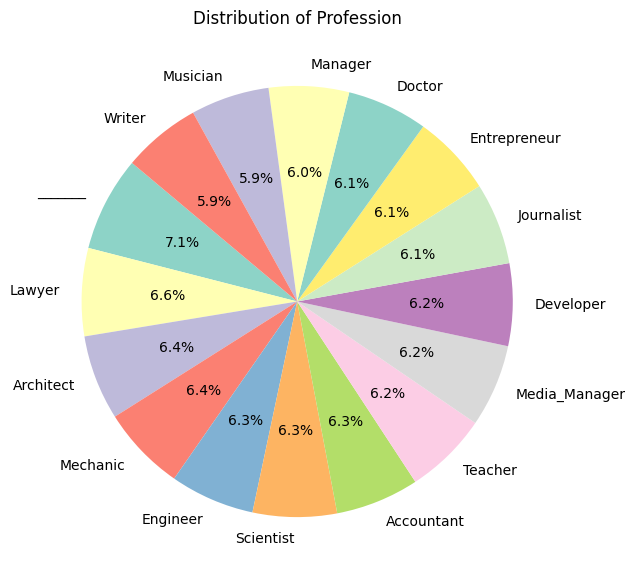

In [16]:
plt.figure(figsize=(10, 7))
counts = train['Profession'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))

plt.title('Distribution of Profession')
plt.show()

In [17]:
train["Total_Delayed_Payments"].value_counts()

Total_Delayed_Payments
19      4267
17      4190
16      4141
10      4113
18      4089
        ... 
827        1
3103       1
1541       1
2560       1
1060       1
Name: count, Length: 615, dtype: int64

In [18]:
train["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    41857
No     28509
NM      9634
Name: count, dtype: int64

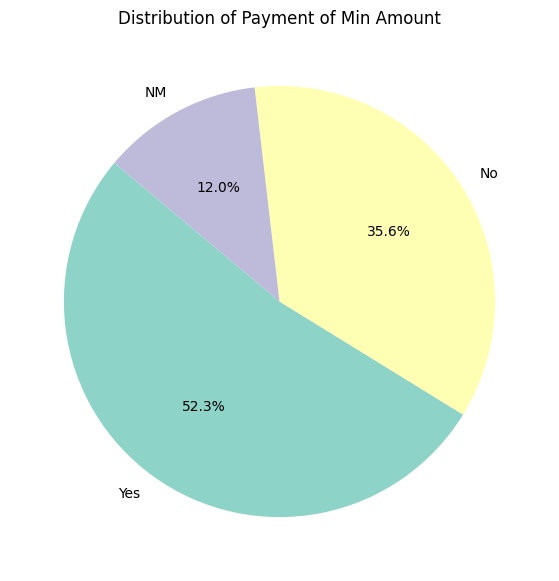

In [19]:
plt.figure(figsize=(10, 7))
counts = train['Payment_of_Min_Amount'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))

plt.title('Distribution of Payment of Min Amount')
plt.show()

In [20]:
train["Credit_History_Age"].value_counts()

Credit_History_Age
18 Years and 3 Months     361
15 Years and 11 Months    361
19 Years and 4 Months     358
19 Years and 3 Months     354
17 Years and 9 Months     349
                         ... 
0 Years and 3 Months       18
0 Years and 2 Months       12
33 Years and 7 Months      11
33 Years and 8 Months       9
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [21]:
train["Month"].value_counts() 

Month
June        10035
August      10025
July        10013
January     10013
May          9999
April        9987
February     9985
March        9943
Name: count, dtype: int64

In [22]:
train["Base_Salary_PerMonth"].value_counts()

Base_Salary_PerMonth
6358.956667     15
2295.058333     12
536.431250      12
6769.130000     12
5766.491667     11
                ..
3478.364167      1
9669.920000      1
11598.240000     1
1583.930000      1
6872.830000      1
Name: count, Length: 13177, dtype: int64

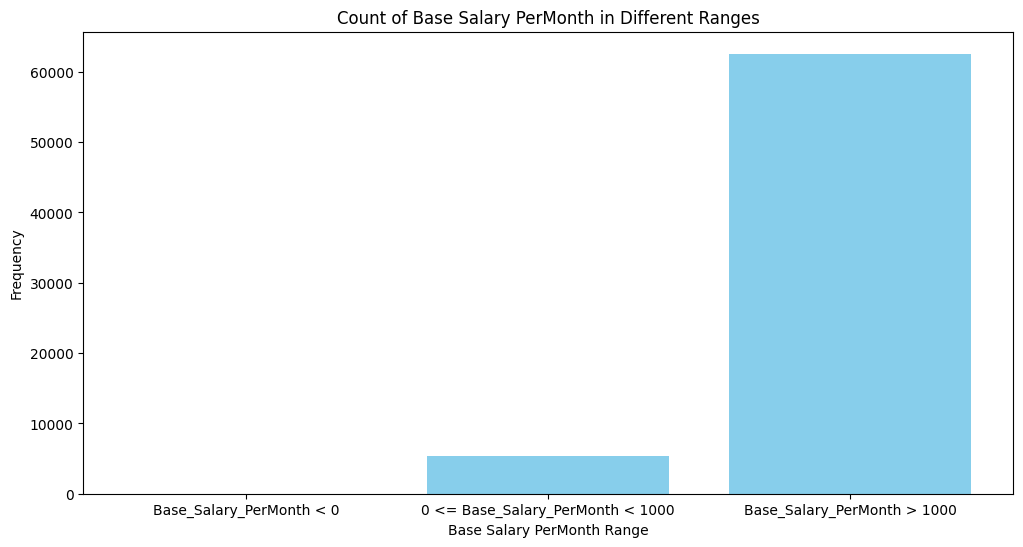

In [23]:
less_than_0 = train[train["Base_Salary_PerMonth"] < 0].shape[0]
between_0_and_1000 = train[(train["Base_Salary_PerMonth"] >= 0) & (train["Base_Salary_PerMonth"] < 1000)].shape[0]
greater_than_1000 = train[train["Base_Salary_PerMonth"] > 1000].shape[0]

# Values and labels for the bar chart
values = [less_than_0, between_0_and_1000, greater_than_1000]
labels = ["Base_Salary_PerMonth < 0", "0 <= Base_Salary_PerMonth < 1000", "Base_Salary_PerMonth > 1000"]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.title("Count of Base Salary PerMonth in Different Ranges")
plt.xlabel("Base Salary PerMonth Range")
plt.ylabel("Frequency")
plt.show()


In [24]:
train["Total_Bank_Accounts"].value_counts()

Total_Bank_Accounts
6       10390
8       10255
7       10230
4        9773
5        9731
        ...  
347         1
1578        1
1261        1
1000        1
1117        1
Name: count, Length: 813, dtype: int64

In [25]:
train[train["Total_Bank_Accounts"]<0]["Total_Bank_Accounts"].value_counts()

Total_Bank_Accounts
-1    17
Name: count, dtype: int64

In [26]:
train[train["Total_Bank_Accounts"]> 300]["Total_Bank_Accounts"].value_counts()

Total_Bank_Accounts
803     7
791     5
1481    4
1096    4
1478    3
       ..
670     1
1517    1
570     1
1434    1
1117    1
Name: count, Length: 676, dtype: int64

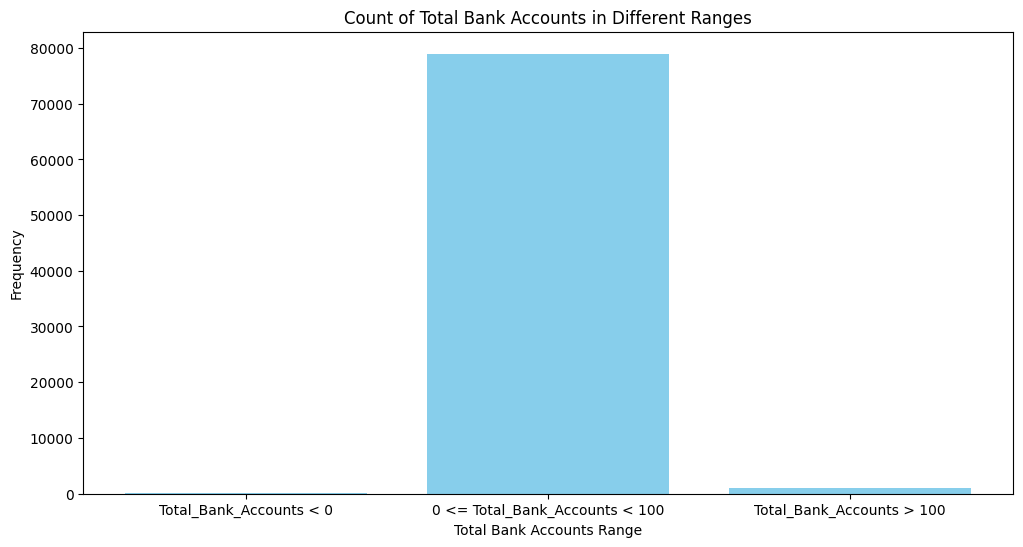

In [27]:
less_than_0 = train[train["Total_Bank_Accounts"] < 0].shape[0]
between_0_and_100 = train[(train["Total_Bank_Accounts"] >= 0) & (train["Total_Bank_Accounts"] < 100)].shape[0]
greater_than_100 = train[train["Total_Bank_Accounts"] > 100].shape[0]

# Values and labels for the bar chart
values = [less_than_0, between_0_and_100, greater_than_100]
labels = ["Total_Bank_Accounts < 0", "0 <= Total_Bank_Accounts < 100", "Total_Bank_Accounts > 100"]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.title("Count of Total Bank Accounts in Different Ranges")
plt.xlabel("Total Bank Accounts Range")
plt.ylabel("Frequency")
plt.show()


In [28]:
train["Total_Credit_Cards"].value_counts()

Total_Credit_Cards
5      14784
7      13334
6      13224
4      11203
3      10618
       ...  
536        1
992        1
506        1
670        1
608        1
Name: count, Length: 1059, dtype: int64

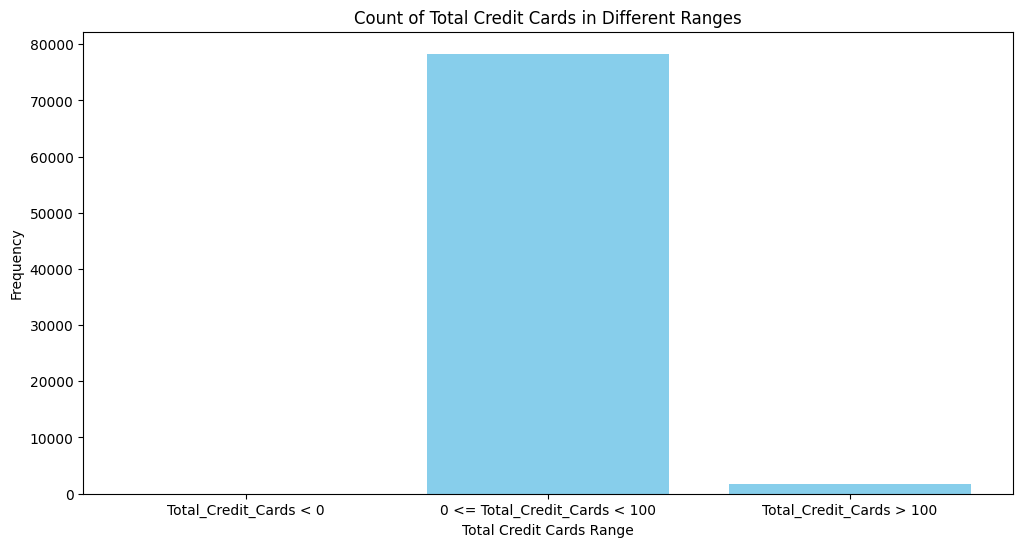

In [29]:
less_than_0 = train[train["Total_Credit_Cards"] < 0].shape[0]
between_0_and_100 = train[(train["Total_Credit_Cards"] >= 0) & (train["Total_Credit_Cards"] < 100)].shape[0]
greater_than_100 = train[train["Total_Credit_Cards"] > 100].shape[0]

# Values and labels for the bar chart
values = [less_than_0, between_0_and_100, greater_than_100]
labels = ["Total_Credit_Cards < 0", "0 <= Total_Credit_Cards < 100", "Total_Credit_Cards > 100"]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.title("Count of Total Credit Cards in Different Ranges")
plt.xlabel("Total Credit Cards Range")
plt.ylabel("Frequency")
plt.show()


In [30]:
train["Delay_from_due_date"].value_counts()

Delay_from_due_date
 15    2885
 13    2764
 8     2629
 14    2628
 10    2621
       ... 
 64      49
 65      41
 66      26
-5       24
 67      16
Name: count, Length: 73, dtype: int64

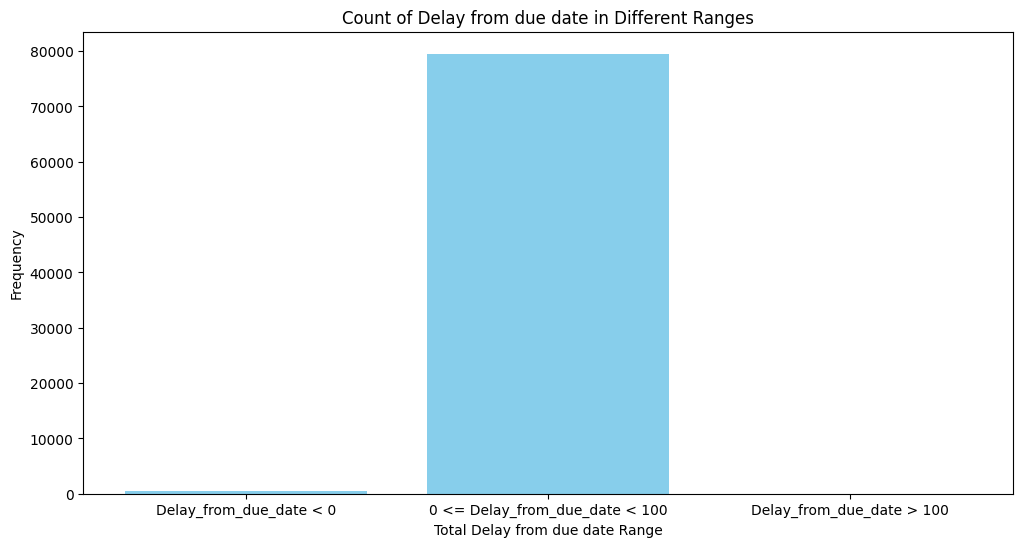

In [31]:
less_than_0 = train[train["Delay_from_due_date"] < 0].shape[0]
between_0_and_100 = train[(train["Delay_from_due_date"] >= 0) & (train["Delay_from_due_date"] < 100)].shape[0]
greater_than_100 = train[train["Delay_from_due_date"] > 100].shape[0]

# Values and labels for the bar chart
values = [less_than_0, between_0_and_100, greater_than_100]
labels = ["Delay_from_due_date < 0", "0 <= Delay_from_due_date < 100", "Delay_from_due_date > 100"]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.title("Count of Delay from due date in Different Ranges")
plt.xlabel("Total Delay from due date Range")
plt.ylabel("Frequency")
plt.show()


In [32]:
train["Total_Credit_Enquiries"].value_counts()

Total_Credit_Enquiries
4.0       8971
3.0       7141
6.0       6506
2.0       6440
7.0       6408
          ... 
197.0        1
727.0        1
596.0        1
327.0        1
1159.0       1
Name: count, Length: 1051, dtype: int64

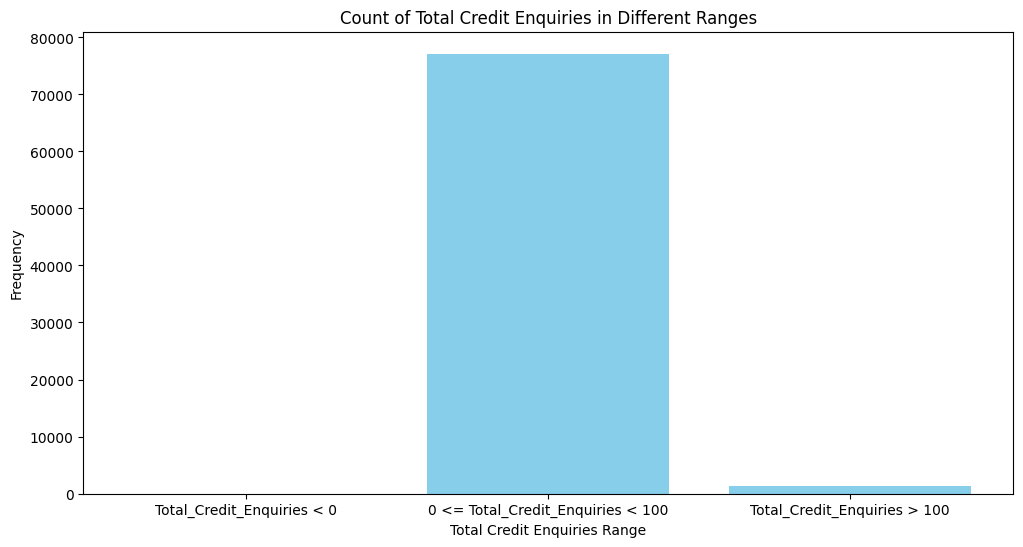

In [33]:
less_than_0 = train[train["Total_Credit_Enquiries"] < 0].shape[0]
between_0_and_100 = train[(train["Total_Credit_Enquiries"] >= 0) & (train["Total_Credit_Enquiries"] < 100)].shape[0]
greater_than_100 = train[train["Total_Credit_Enquiries"] > 100].shape[0]

# Values and labels for the bar chart
values = [less_than_0, between_0_and_100, greater_than_100]
labels = ["Total_Credit_Enquiries < 0", "0 <= Total_Credit_Enquiries < 100", "Total_Credit_Enquiries > 100"]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.title("Count of Total Credit Enquiries in Different Ranges")
plt.xlabel("Total Credit Enquiries Range")
plt.ylabel("Frequency")
plt.show()


In [34]:
train["Ratio_Credit_Utilization"].value_counts()

Ratio_Credit_Utilization
34.462154    1
39.895087    1
40.303168    1
27.338973    1
24.687692    1
            ..
29.691591    1
39.439822    1
33.436401    1
24.547566    1
32.195044    1
Name: count, Length: 80000, dtype: int64

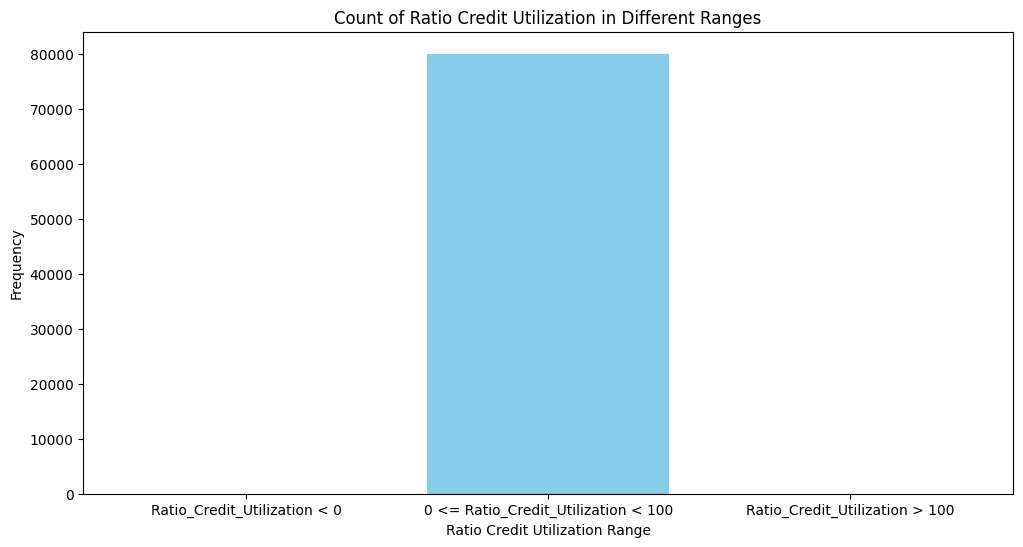

In [35]:
less_than_0 = train[train["Ratio_Credit_Utilization"] < 0].shape[0]
between_0_and_100 = train[(train["Ratio_Credit_Utilization"] >= 0) & (train["Ratio_Credit_Utilization"] < 100)].shape[0]
greater_than_100 = train[train["Ratio_Credit_Utilization"] > 100].shape[0]

# Values and labels for the bar chart
values = [less_than_0, between_0_and_100, greater_than_100]
labels = ["Ratio_Credit_Utilization < 0", "0 <= Ratio_Credit_Utilization < 100", "Ratio_Credit_Utilization > 100"]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.title("Count of Ratio Credit Utilization in Different Ranges")
plt.xlabel("Ratio Credit Utilization Range")
plt.ylabel("Frequency")
plt.show()


In [36]:
train["Per_Month_EMI"].value_counts()

Per_Month_EMI
0.000000        8512
47.073883          8
41.935689          8
212.508095         8
341.056663         8
                ... 
3087.000000        1
64322.000000       1
49092.000000       1
39347.000000       1
7352.000000        1
Name: count, Length: 14324, dtype: int64

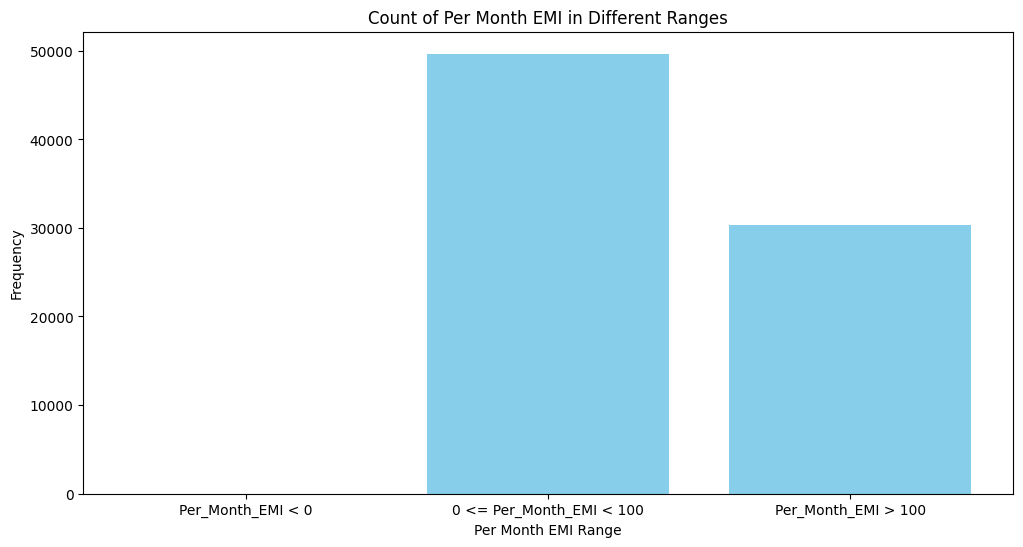

In [37]:
less_than_0 = train[train["Per_Month_EMI"] < 0].shape[0]
between_0_and_100 = train[(train["Per_Month_EMI"] >= 0) & (train["Per_Month_EMI"] < 100)].shape[0]
greater_than_100 = train[train["Per_Month_EMI"] > 100].shape[0]

# Values and labels for the bar chart
values = [less_than_0, between_0_and_100, greater_than_100]
labels = ["Per_Month_EMI < 0", "0 <= Per_Month_EMI < 100", "Per_Month_EMI > 100"]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.title("Count of Per Month EMI in Different Ranges")
plt.xlabel("Per Month EMI Range")
plt.ylabel("Frequency")
plt.show()


In [38]:
train["Monthly_Investment"].value_counts()

Monthly_Investment
__10000__             3479
0                      140
83.30040818642512        1
319.41410123155714       1
50.39575348313112        1
                      ... 
311.38720938035044       1
261.6638063023449        1
621.1258747420612        1
32.57397945              1
219.89003507274796       1
Name: count, Length: 72778, dtype: int64

# Data Preprocessing

#### Function made for removing '_' and '-' from object type column which contained numerical data type

In [39]:
def filter_column_numerical(value: str):
    if '_' in str(value):
        return value.split('_')[0]
    elif '-' in str(value):
        return value.split('-')[1]
    else:
        return value


## Data Preprocessing on train dataset

#### Removing unneccessary columns from train dataset

In [40]:
train.drop(["ID", "Customer_ID", "Name", "Number", "Month", "Loan_Type"], axis=1, inplace=True)
train.duplicated().any()

False

**Replacing '_' present in Credit_Mix with null**

In [41]:
train['Credit_Mix'] = train['Credit_Mix'].replace('_', np.nan)

**Replacing '_' present in Credit_Limit with null and then converting it to float data type**

In [42]:
train['Credit_Limit'] = train['Credit_Limit'].replace('_', np.nan)
train['Credit_Limit'] = train['Credit_Limit'].astype("float")
train['Credit_Limit'] = train['Credit_Limit'].fillna(train["Credit_Limit"].mean())
train['Credit_Limit'] = train['Credit_Limit'].round(3)

**Replacing '__-333333333333333333333333333__' present in Monthly_Balance with null and then converting it to float data type**

In [43]:
train['Monthly_Balance'] = train['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan)
train['Monthly_Balance'] = train['Monthly_Balance'].astype("float")

**Replacing '!@9#%8' present in Payment_Behaviour with null**

In [44]:
train["Payment_Behaviour"] = train["Payment_Behaviour"].replace("!@9#%8", np.nan)

**Handling Categorical Data in Payment_Behaviour and assigning numbers according to priority**

In [45]:
train["Payment_Behaviour"] = train["Payment_Behaviour"].replace("Low_spent_Small_value_payments", 1)
train["Payment_Behaviour"] = train["Payment_Behaviour"].replace("Low_spent_Medium_value_payments", 2)
train["Payment_Behaviour"] = train["Payment_Behaviour"].replace("Low_spent_Large_value_payments", 3)
train["Payment_Behaviour"] = train["Payment_Behaviour"].replace("High_spent_Small_value_payments", 4)
train["Payment_Behaviour"] = train["Payment_Behaviour"].replace("High_spent_Medium_value_payments", 5)
train["Payment_Behaviour"] = train["Payment_Behaviour"].replace("High_spent_Large_value_payments", 6)

/tmp/ipykernel_30/4216138786.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train["Payment_Behaviour"] = train["Payment_Behaviour"].replace("High_spent_Large_value_payments", 6)


In [46]:
# train["Payment_Behaviour"] = LabelEncoder().fit_transform(train["Payment_Behaviour"])

**Removing '-' and '_' from Current_Debt_Outstanding and then converting it to float data type**

In [47]:
train["Current_Debt_Outstanding"] = train["Current_Debt_Outstanding"].apply(filter_column_numerical)
train["Current_Debt_Outstanding"] = train["Current_Debt_Outstanding"].astype(float)

**Removing '-' and '_' from Age and then converting it to int data type and then replacing age>90 and age<10 with null**

In [48]:
train["Age"] = train["Age"].apply(filter_column_numerical)
train["Age"].value_counts()
train["Age"] = train["Age"].astype(int)
train.loc[(train["Age"] > 90) | (train["Age"] < 10), "Age"] = np.nan

**Removing '-' and '_' from Income_Annual and then converting it to float data type**

In [49]:
train["Income_Annual"] = train["Income_Annual"].apply(filter_column_numerical)
train["Income_Annual"] = train["Income_Annual"].astype(float)

**Removing '-' and '_' from Total_Current_Loans and then converting it to int data type**

In [50]:
train["Total_Current_Loans"] = train["Total_Current_Loans"].apply(filter_column_numerical)
train["Total_Current_Loans"] = train["Total_Current_Loans"].astype(int)


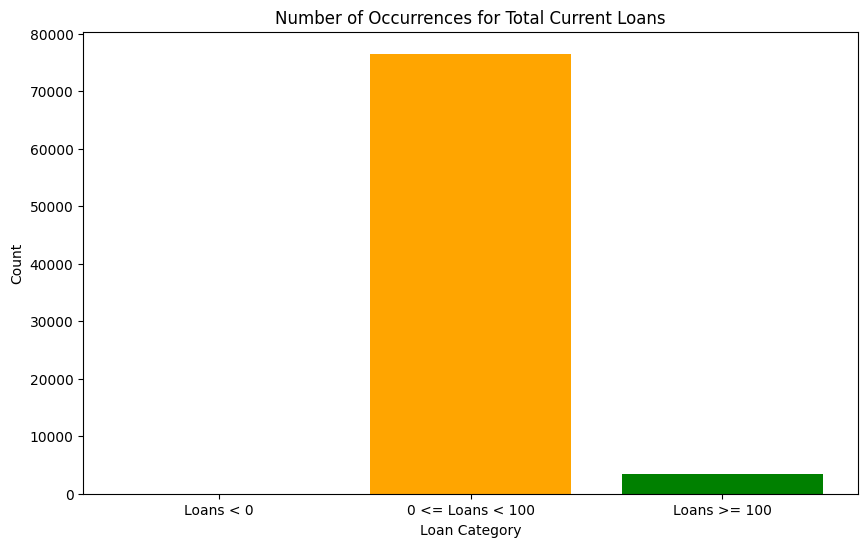

In [51]:
loan_counts = {
    "Loans < 0": (train["Total_Current_Loans"] < 0).sum(),
    "0 <= Loans < 100": ((train["Total_Current_Loans"] >= 0) & (train["Total_Current_Loans"] < 100)).sum(),
    "Loans >= 100": (train["Total_Current_Loans"] >= 100).sum()
}

# Convert the dictionary to a DataFrame
loan_counts_df = pd.DataFrame(list(loan_counts.items()), columns=["Loan Category", "Count"])

# Plotting the bar chart with adjusted figure size
plt.figure(figsize=(10, 6))  # Increase width for better label spacing
plt.bar(loan_counts_df["Loan Category"], loan_counts_df["Count"], color=['blue', 'orange', 'green'])
plt.title("Number of Occurrences for Total Current Loans")
plt.xlabel("Loan Category")
plt.ylabel("Count")
plt.show()

**Replacing all cells which are having Total_Current_Loans>100 with null as they are very less in number**

In [52]:
train.loc[train["Total_Current_Loans"] > 100, "Total_Current_Loans"] = np.nan

**Replacing "_______" with null in Profession column**

In [53]:
train["Profession"] = train["Profession"].replace("_______", np.nan)
train["Profession"] = train["Profession"].astype("object")

**Replacing NaN with null in Monthly_Investment column**

In [54]:
train["Monthly_Investment"] = train["Monthly_Investment"].replace("NaN", np.nan)

**Removing all the '-' and '_' from Total_Delayed_Payments and then replacing all Nan with null values and then converting it to float**

In [55]:
train["Total_Delayed_Payments"] = train["Total_Delayed_Payments"].apply(filter_column_numerical)
train["Total_Delayed_Payments"] = train["Total_Delayed_Payments"].replace("NaN", np.nan)

In [56]:
train["Total_Delayed_Payments"] = train["Total_Delayed_Payments"].astype("float")

**Seperating years and months from Credit_History_Age column**

In [57]:
years = []
months = []
for value in train["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and') + 1])
        years.append(years_)
        months.append(months_)

**Making two different columns namely Credit_Age_years and Credit_Age_months for years and months respectively**

In [58]:
train['Credit_Age_years'] = pd.Series(years)
train['Credit_Age_months'] = pd.Series(months)

**Dropping Credit_History_Age column**

In [59]:
train.drop('Credit_History_Age', axis=1, inplace=True)

**Replacing all the negative cells with 0 in Delay_from_due_date column**

In [60]:
train["Delay_from_due_date"] = train["Delay_from_due_date"].clip(lower=0)

**Replacing all -1 cells with 0 in Total_Bank_Accounts column**

In [61]:
train["Total_Bank_Accounts"] = train["Total_Bank_Accounts"].replace(-1, 0)

**Rounding off to two decimal places**

In [62]:
train["Ratio_Credit_Utilization"] = train["Ratio_Credit_Utilization"].round(2)

**Rounding off to three decimal places**

In [63]:

train["Per_Month_EMI"] = train["Per_Month_EMI"].round(3)

**Replacing __10000__ with null and then converting it to float data type and then rounding it to three places of decimal**

In [64]:
train["Monthly_Investment"] = train["Monthly_Investment"].replace("__10000__", np.nan)
train["Monthly_Investment"] = train["Monthly_Investment"].astype("float")
train["Monthly_Investment"] = train["Monthly_Investment"].round(3)

**Replacing '-' with null**

In [65]:
train['Credit_Mix']=train['Credit_Mix'].replace("-",np.nan)

**Assigning numerical values to Credit_Mix column values**

In [66]:
train['Credit_Mix']=train['Credit_Mix'].replace("Standard",1)
train['Credit_Mix']=train['Credit_Mix'].replace("Bad",2)
train['Credit_Mix']=train['Credit_Mix'].replace("Good",3)


/tmp/ipykernel_30/1162606343.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Credit_Mix']=train['Credit_Mix'].replace("Good",3)


In [67]:
# train["Credit_Mix"] = LabelEncoder().fit_transform(train["Credit_Mix"])

**Converting categorical data to numerical data**

In [68]:
columns = [ 'Profession', 'Payment_of_Min_Amount']
for item in columns:
    train[item] = LabelEncoder().fit_transform(train[item])
label_encoder = LabelEncoder()

**Seperating numerical and object data types**

In [69]:
numerical_data = []
object_data = []

for column in train.columns:
    if train.dtypes[column] != 'object':
        numerical_data.append(column)
    else:
        object_data.append(column)

In [70]:
numerical_data

['Age',
 'Profession',
 'Income_Annual',
 'Base_Salary_PerMonth',
 'Total_Bank_Accounts',
 'Total_Credit_Cards',
 'Rate_Of_Interest',
 'Total_Current_Loans',
 'Delay_from_due_date',
 'Total_Delayed_Payments',
 'Credit_Limit',
 'Total_Credit_Enquiries',
 'Credit_Mix',
 'Current_Debt_Outstanding',
 'Ratio_Credit_Utilization',
 'Payment_of_Min_Amount',
 'Per_Month_EMI',
 'Monthly_Investment',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Age_years',
 'Credit_Age_months']

**Plotting Correlation Matrix**

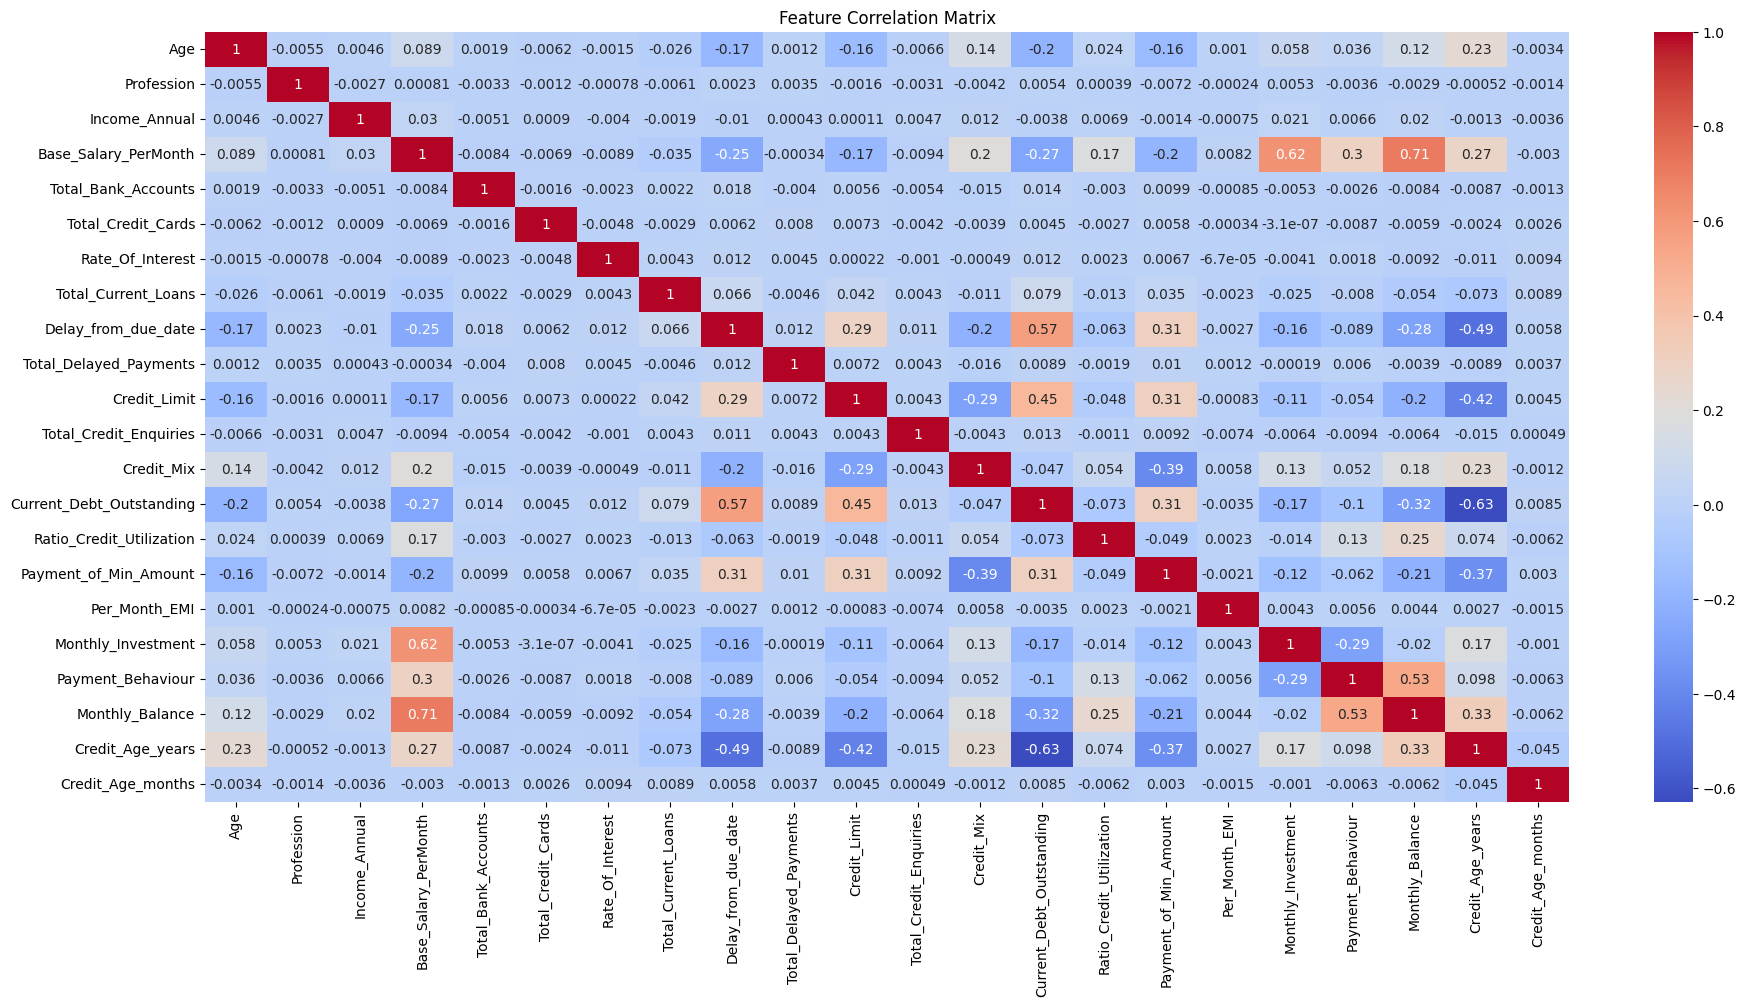

In [71]:
plt.figure(figsize=(22, 10))
sns.heatmap(train[numerical_data].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

**Defining knn imputer**

In [72]:
knn_imputer = KNNImputer(n_neighbors=3)

**Filling all the missing values with knn imputed values**

In [73]:
train[numerical_data] = knn_imputer.fit_transform(train[numerical_data])

**Encoding Credit_Score with the help of Label Encoder**

In [74]:
train['Credit_Score'] = LabelEncoder().fit_transform(train['Credit_Score'])

**Checking if all the null values have been filled or not**

In [75]:
train.isnull().sum()

Age                         0
Profession                  0
Income_Annual               0
Base_Salary_PerMonth        0
Total_Bank_Accounts         0
Total_Credit_Cards          0
Rate_Of_Interest            0
Total_Current_Loans         0
Delay_from_due_date         0
Total_Delayed_Payments      0
Credit_Limit                0
Total_Credit_Enquiries      0
Credit_Mix                  0
Current_Debt_Outstanding    0
Ratio_Credit_Utilization    0
Payment_of_Min_Amount       0
Per_Month_EMI               0
Monthly_Investment          0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit_Age_years            0
Credit_Age_months           0
dtype: int64

**Storing result column i.e, Credit_Score in y and then dropping that column**

In [76]:
y = train['Credit_Score']
train.drop(["Credit_Score"], axis=1, inplace=True)

**Applying robust Scaling on train dataset**

In [77]:
robust_scaler = RobustScaler()
robust_scaler.fit(train)

scaled_data = robust_scaler.transform(train)
scaled_df = pd.DataFrame(scaled_data, columns=train.columns)
train=scaled_df

## Data Preprocessing on test Dataset 

***Same all the above steps has been repeated on test dataset****

In [78]:
test_Id=test["ID"]
test.drop(["ID", "Customer_ID", "Name", "Number", "Month", "Loan_Type"], axis=1, inplace=True)
test.duplicated().any()

False

In [79]:
test['Credit_Mix'] = test['Credit_Mix'].replace('_', np.nan)
test['Credit_Limit'] = test['Credit_Limit'].replace('_', np.nan)
test['Credit_Limit'] = test['Credit_Limit'].astype("float")
test['Credit_Limit'] = test['Credit_Limit'].fillna(test["Credit_Limit"].mean())
test['Credit_Limit'] = test['Credit_Limit'].round(3)
test['Monthly_Balance'] = test['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan)
test['Monthly_Balance'] = test['Monthly_Balance'].astype("float")

In [80]:
test["Payment_Behaviour"] = test["Payment_Behaviour"].replace("!@9#%8", np.nan)
test["Payment_Behaviour"] = test["Payment_Behaviour"].replace("Low_spent_Small_value_payments", 1)
test["Payment_Behaviour"] = test["Payment_Behaviour"].replace("Low_spent_Medium_value_payments", 2)
test["Payment_Behaviour"] = test["Payment_Behaviour"].replace("Low_spent_Large_value_payments", 3)
test["Payment_Behaviour"] = test["Payment_Behaviour"].replace("High_spent_Small_value_payments", 4)
test["Payment_Behaviour"] = test["Payment_Behaviour"].replace("High_spent_Medium_value_payments", 5)
test["Payment_Behaviour"] = test["Payment_Behaviour"].replace("High_spent_Large_value_payments", 6)
# test["Payment_Behaviour"] = LabelEncoder().fit_transform(test["Payment_Behaviour"])
test["Current_Debt_Outstanding"] = test["Current_Debt_Outstanding"].apply(filter_column_numerical)
test["Current_Debt_Outstanding"] = test["Current_Debt_Outstanding"].astype(float)

/tmp/ipykernel_30/3092854624.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test["Payment_Behaviour"] = test["Payment_Behaviour"].replace("High_spent_Large_value_payments", 6)


In [81]:
test["Age"] = test["Age"].apply(filter_column_numerical)
test["Age"].value_counts()
test["Age"] = test["Age"].astype(int)
test.loc[(test["Age"] > 90) | (test["Age"] < 10), "Age"] = np.nan
test["Income_Annual"] = test["Income_Annual"].apply(filter_column_numerical)
test["Income_Annual"] = test["Income_Annual"].astype(float)
test["Total_Current_Loans"] = test["Total_Current_Loans"].apply(filter_column_numerical)
test["Total_Current_Loans"] = test["Total_Current_Loans"].astype(int)
test.loc[test["Total_Current_Loans"] > 100, "Total_Current_Loans"] = np.nan

In [82]:
test["Profession"] = test["Profession"].replace("_______", np.nan)
test["Profession"] = test["Profession"].astype("object")
test["Total_Delayed_Payments"] = test["Total_Delayed_Payments"].apply(filter_column_numerical)
test["Total_Delayed_Payments"] = test["Total_Delayed_Payments"].replace("NaN", np.nan)
test["Monthly_Investment"] = test["Monthly_Investment"].replace("NaN", np.nan)
test["Total_Delayed_Payments"] = test["Total_Delayed_Payments"].astype("float")

In [83]:
years = []
months = []
for value in test["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and') + 1])
        years.append(years_)
        months.append(months_)
test['Credit_Age_years'] = pd.Series(years)
test['Credit_Age_months'] = pd.Series(months)

In [84]:
test.drop('Credit_History_Age', axis=1, inplace=True)
test["Delay_from_due_date"] = test["Delay_from_due_date"].clip(lower=0)
test["Total_Bank_Accounts"] = test["Total_Bank_Accounts"].replace(-1, 0)
test["Ratio_Credit_Utilization"] = test["Ratio_Credit_Utilization"].round(2)

In [85]:

test["Per_Month_EMI"] = test["Per_Month_EMI"].round(3)
test["Monthly_Investment"] = test["Monthly_Investment"].replace("__10000__", np.nan)
test["Monthly_Investment"] = test["Monthly_Investment"].astype("float")
test["Monthly_Investment"] = test["Monthly_Investment"].round(3)

In [86]:

test['Credit_Mix'] = test['Credit_Mix'].replace("-", np.nan)
# test["Credit_Mix"] = LabelEncoder().fit_transform(test["Credit_Mix"])
test['Credit_Mix'] = test['Credit_Mix'].replace("Standard", 1)
test['Credit_Mix'] = test['Credit_Mix'].replace("Bad", 2)
test['Credit_Mix'] = test['Credit_Mix'].replace("Good", 3)


columns = ['Profession','Payment_of_Min_Amount']
for item in columns:
    test[item] = LabelEncoder().fit_transform(test[item])


/tmp/ipykernel_30/4090064327.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Credit_Mix'] = test['Credit_Mix'].replace("Good", 3)


In [87]:
numerical_test_data = []
object_test_data = []

for column in test.columns:
    if test.dtypes[column] != 'object':
        numerical_test_data.append(column)
    else:
        object_data.append(column)

In [88]:
numerical_test_data

['Age',
 'Profession',
 'Income_Annual',
 'Base_Salary_PerMonth',
 'Total_Bank_Accounts',
 'Total_Credit_Cards',
 'Rate_Of_Interest',
 'Total_Current_Loans',
 'Delay_from_due_date',
 'Total_Delayed_Payments',
 'Credit_Limit',
 'Total_Credit_Enquiries',
 'Credit_Mix',
 'Current_Debt_Outstanding',
 'Ratio_Credit_Utilization',
 'Payment_of_Min_Amount',
 'Per_Month_EMI',
 'Monthly_Investment',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Age_years',
 'Credit_Age_months']

In [89]:

test[numerical_test_data] = knn_imputer.transform(test[numerical_test_data])

In [90]:
test.isnull().sum()

Age                         0
Profession                  0
Income_Annual               0
Base_Salary_PerMonth        0
Total_Bank_Accounts         0
Total_Credit_Cards          0
Rate_Of_Interest            0
Total_Current_Loans         0
Delay_from_due_date         0
Total_Delayed_Payments      0
Credit_Limit                0
Total_Credit_Enquiries      0
Credit_Mix                  0
Current_Debt_Outstanding    0
Ratio_Credit_Utilization    0
Payment_of_Min_Amount       0
Per_Month_EMI               0
Monthly_Investment          0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Age_years            0
Credit_Age_months           0
dtype: int64

In [91]:
scaled_data = robust_scaler.transform(test)
scaled_df = pd.DataFrame(scaled_data, columns=test.columns)
test = scaled_df

# Splitting train and test dataset

In [92]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

# Different Models

## Random Forest Classifier

In [93]:
# param_grid = {
#     'n_estimators': np.arange(50, 401, 25),            
#     'max_depth': [None] + list(np.arange(5, 31, 3)),   
#     'min_samples_split': np.arange(2, 21, 1),          
#     'min_samples_leaf': np.arange(1, 6),               
#     'max_features': [0.1, 0.3, 0.5, 'sqrt', 'log2'],   
#     'criterion': ['gini', 'entropy'],   
#     'bootstrap': [True, False]
# }

# # Adjust RandomizedSearchCV with a higher n_iter
# random_search = RandomizedSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     param_distributions=param_grid,
#     n_iter=200,               
#     scoring='accuracy',
#     cv=5,
#     random_state=42,
#     n_jobs=-1
# )

# random_search.fit(X_train, y_train)

# # Display the best parameters and accuracy
# print("Best parameters found: ", random_search.best_params_)
# print("Best accuracy: ", random_search.best_score_)
# print("Accuracy on x test", accuracy_score(y_test, random_search.best_estimator_.predict(X_test)))

# # Predict on the test set
# test_predictions = random_search.best_estimator_.predict(test)



In [94]:
# rf_params={
#     'n_estimators':325,
#     'min_samples_split':8,
#     'min_samples_leaf':1,
#     'max_features':'sqrt',
#     'max_depth':None,
#     'criterion': 'entropy',
#     'bootstrap':False,
#     'random_state':42
# }

# model_rf=RandomForestClassifier(**rf_params)

# model_rf.fit(X_train, y_train)

# print("Accuracy on x test", accuracy_score(y_test, model_rf.predict(X_test)))
# test_predictions=model_rf.predict(test)

## Gaussian NB

In [95]:
# param_grid = {
#     'var_smoothing': np.logspace(0, -9, num=100)  # Range of values for variance smoothing
# }


# random_search = RandomizedSearchCV(
#     estimator=GaussianNB(),
#     param_distributions=param_grid,
#     n_iter=10,              
#     scoring='accuracy',     
#     cv=5,
#     random_state=42,
#     n_jobs=-1
# )


# random_search.fit(X_train, y_train)


# print("Best parameters found: ", random_search.best_params_)
# print("Best accuracy (CV): ", random_search.best_score_)
# print("Accuracy on X_test: ", accuracy_score(y_test, random_search.best_estimator_.predict(X_test)))


# test_predictions = random_search.best_estimator_.predict(test)


## XG Boost Classifier

In [96]:


# from sklearn.model_selection import StratifiedKFold

# # Define the model with multi-class objective
# xgb = XGBClassifier(
#     use_label_encoder=False,
#     eval_metric='mlogloss',
#     objective='multi:softmax',  
#     num_class=3,               
#     random_state=42  
# )

# # Refined parameter distribution for RandomizedSearchCV (without scale_pos_weight)
# param_dist = {
#     'n_estimators': np.arange(100, 800, 50),          
#     'max_depth': np.arange(3, 10, 1),                
#     'learning_rate': np.linspace(0.01, 0.2, 40),      
#     'subsample': np.linspace(0.6, 1.0, 5),
#     'colsample_bytree': np.linspace(0.6, 1.0, 5),
#     'gamma': np.linspace(0, 0.5, 6),
#     'min_child_weight': np.arange(1, 8, 1),
#     'reg_alpha': np.linspace(0, 1, 6),                 
#     'reg_lambda': np.linspace(0.5, 1.5, 6)
# }

# # Set up RandomizedSearchCV with a more thorough exploration
# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     n_iter=150,               
#     scoring='accuracy',
#     cv=StratifiedKFold(n_splits=5),
#     random_state=42,
#     verbose=1,
#     n_jobs=-1
# )

# # Fit the model to the training data
# random_search.fit(X_train, y_train)

# # Output the best parameters and scores
# print("Best Parameters:", random_search.best_params_)
# print("Best Cross-Validated Score:", random_search.best_score_)
# print("Accuracy on X_test:", accuracy_score(y_test, random_search.best_estimator_.predict(X_test)))

# # Predictions on test data
# test_predictions = random_search.best_estimator_.predict(test)



In [97]:
# # XGBoost parameters
# xgb_params = {
#     'n_estimators': 650,
#     'max_depth': 9,
#     'learning_rate': 0.1366666666666667,
#     'subsample': 0.9,
#     'colsample_bytree': 0.6,
#     'gamma': 0.0,
#     'min_child_weight': 6,
#     'reg_alpha': 1.0,  # L1 regularization term
#     'reg_lambda': 1.1,  # L2 regularization term
#     'use_label_encoder': False,
#     'eval_metric': 'mlogloss',
#     'random_state': 42
# }

# # Initialize the XGBoost model with the specified parameters
# model_xgb = XGBClassifier(**xgb_params)

# # Train the model
# model_xgb.fit(X_train, y_train)

# # Evaluate accuracy on test data
# print("Accuracy on X_test:", accuracy_score(y_test, model_xgb.predict(X_test)))

# # Make predictions on the final test set
# test_predictions = model_xgb.predict(test)


## Voting Classifier (Best Accuracy Model)

In [98]:


rf_params=RandomForestClassifier(
    n_estimators=325,
    min_samples_split=8,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    criterion='entropy',
    bootstrap=False,
    random_state=42
)

xgb_params = XGBClassifier(
    n_estimators= 650,
    max_depth= 9,
    learning_rate= 0.1366666666666667,
    subsample= 0.9,
    colsample_bytree= 0.6,
    gamma=0.0,
    min_child_weight=6,
    reg_alpha= 1.0,  # L1 regularization term on weights
    reg_lambda= 1.1,  # L2 regularization term on weights
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)





voting_clf=VotingClassifier(estimators=[('rf',rf_params),('xgb',xgb_params)],voting='hard')

voting_clf.fit(X_train, y_train)


print("Accuracy on x test",accuracy_score(y_test,voting_clf.predict(X_test)))

test_predictions=voting_clf.predict(test)




Accuracy on x test 0.80075


## AdaBoost Classifier

In [99]:
# adaboost = AdaBoostClassifier(
#     base_estimator=DecisionTreeClassifier(random_state=42),  
#     random_state=42  
# )

# # Define the hyperparameter grid
# param_dist = {
#     'n_estimators': np.arange(50, 300, 50),  
#     'learning_rate': np.linspace(0.01, 1.0, 10), 
#     'base_estimator__max_depth': np.arange(1, 10, 1),  
#     'base_estimator__min_samples_split': np.arange(2, 10, 2) 
# }

# # Set up RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=adaboost,
#     param_distributions=param_dist,
#     n_iter=5, 
#     scoring='accuracy',  
#     cv=5,  
#     random_state=42,  
#     verbose=1,
#     n_jobs=-1
# )


# random_search.fit(X_train, y_train)


# print("Best Parameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)
# print("Accuracy on x test",accuracy_score(y_test,random_search.best_estimator_.predict(X_test)))


# test_predictions=random_search.best_estimator_.predict(test)


## Decision Tree Classifier

In [100]:
# param_dist = {
#     'max_depth': [None] + list(np.arange(5, 31, 5)),  
#     'min_samples_split': np.arange(2, 21, 5),         
#     'min_samples_leaf': np.arange(1, 51, 10),        
#     'max_features': ["auto", "sqrt", "log2", None],
#     'criterion': ["gini", "entropy"]
# }


# dt = DecisionTreeClassifier(random_state=42)


# random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, 
#                                    n_iter=10, cv=5, scoring='accuracy', 
#                                    random_state=42, n_jobs=-1)


# random_search.fit(X_train, y_train)


# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)
# print("Accuracy on x test",accuracy_score(y_test,random_search.best_estimator_.predict(X_test)))

# test_predictions=random_search.best_estimator_.predict(test)


**Submitting prediction submission_.csv**

In [101]:
credit_score_mapping = {0: 'Good', 1: 'Poor', 2: 'Standard'}

# Map the values in 'test_predictions' to their corresponding labels
submission = pd.DataFrame({
    'ID': test_Id,
    'Credit_Score': [credit_score_mapping.get(pred, 'Unknown') for pred in test_predictions]
})

submission.to_csv('submission_.csv', index=False)